In [3]:
import pandas as pd
from google.colab import files

# Leer CSV
df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
import numpy as np

# Crear nuevas columnas
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Weekday'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month
df['AvgPrice'] = df['Total'] / df['Quantity']

# Eliminar columnas no necesarias
df.drop(columns=[
    'Invoice ID', 'Date', 'Time', 'Tax 5%', 'Total', 'cogs',
    'gross margin percentage', 'gross income', 'Rating'
], inplace=True)

# Renombrar columnas a snake_case
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.head()

<ipython-input-4-28e8b3a6e1d5>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


,branch,city,customer_type,gender,product_line,unit_price,quantity,payment,hour,weekday,month,avgprice
0,A,Yangon,Member,Female,Health and beauty,74.69,7,Ewallet,13,5,1,78.4245
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,Cash,10,4,3,16.0440
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,Credit card,13,6,3,48.6465
3,A,Yangon,Member,Male,Health and beauty,58.22,8,Ewallet,20,6,1,61.1310
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,Ewallet,10,4,2,90.6255


In [5]:
# Estadísticas básicas
df.describe(include='all')

,branch,city,customer_type,gender,product_line,unit_price,quantity,payment,hour,weekday,month,avgprice
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000
unique,3,3,2,2,6,NaN,NaN,3,NaN,NaN,NaN,NaN
top,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,Ewallet,NaN,NaN,NaN,NaN
freq,340,340,501,501,178,NaN,NaN,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,NaN,14.910000,3.032000,1.993000,58.455736
std,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,NaN,3.186857,1.973543,0.835254,27.819360
min,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,NaN,10.000000,0.000000,1.000000,10.584000
25%,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,NaN,12.000000,1.000000,1.000000,34.518750
50%,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,NaN,15.000000,3.000000,2.000000,57.991500
75%,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,NaN,18.000000,5.000000,3.000000,81.831750


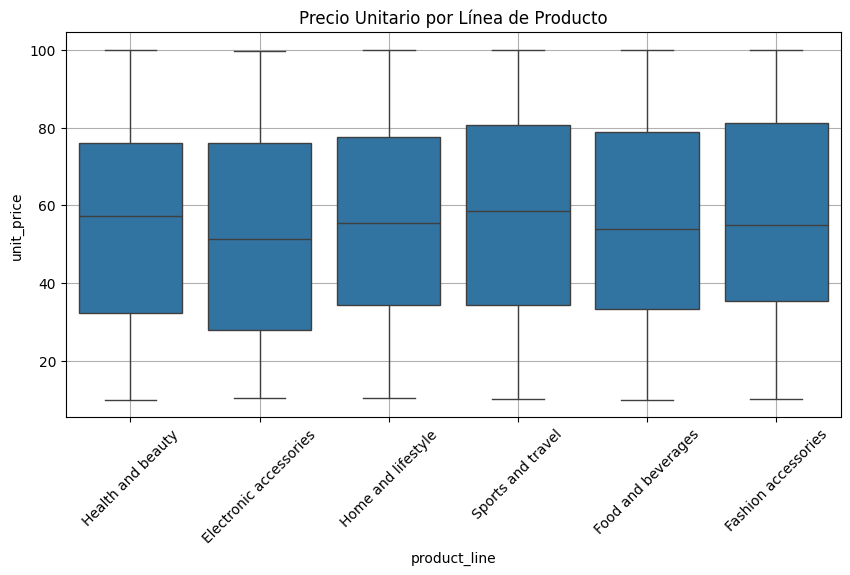

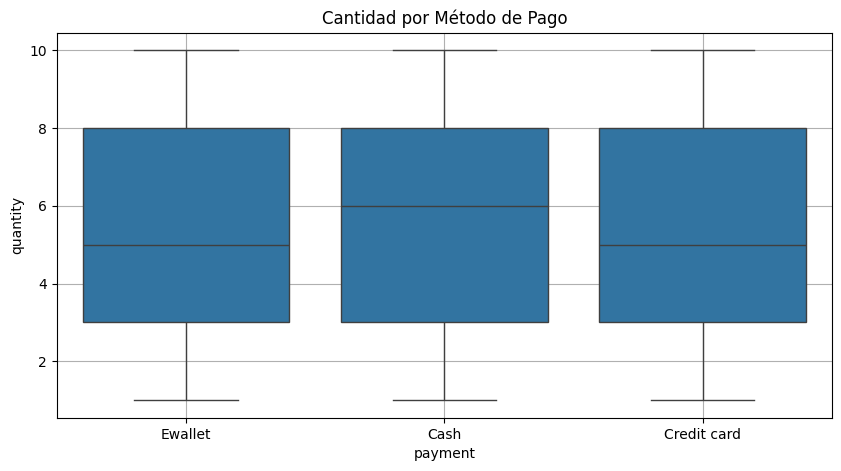

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Precio unitario vs línea de producto
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='product_line', y='unit_price')
plt.xticks(rotation=45)
plt.title("Precio Unitario por Línea de Producto")
plt.grid(True)
plt.show()

# Cantidad por método de pago
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='payment', y='quantity')
plt.title("Cantidad por Método de Pago")
plt.grid(True)
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le_dict = {}
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)


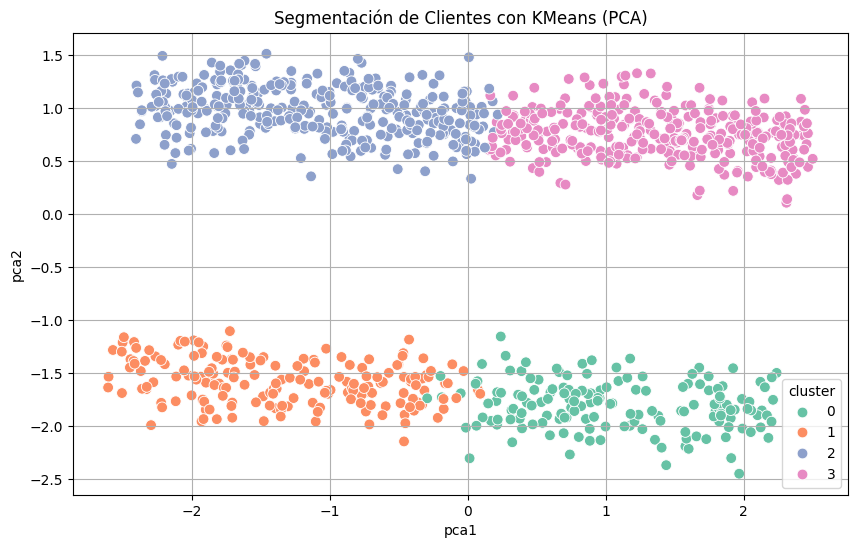

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# PCA para visualizar
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

# Visualizar clústeres
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2', s=60)
plt.title("Segmentación de Clientes con KMeans (PCA)")
plt.grid(True)
plt.show()

In [9]:
# Descripción por grupo
df.groupby('cluster').agg({
    'gender': lambda x: x.mode()[0],
    'customer_type': lambda x: x.mode()[0],
    'payment': lambda x: x.mode()[0],
    'product_line': lambda x: x.mode()[0],
    'unit_price': 'mean',
    'quantity': 'mean',
    'avgprice': 'mean',
    'hour': 'mean',
    'weekday': 'mean',
    'month': 'mean'
}).round(2)

,gender,customer_type,payment,product_line,unit_price,quantity,avgprice,hour,weekday,month
cluster,,,,,,,,,,
0,Female,Normal,Ewallet,Home and lifestyle,78.98,5.37,82.93,14.51,2.95,2.03
1,Male,Member,Ewallet,Food and beverages,33.77,5.55,35.46,14.81,3.14,2.02
2,Female,Normal,Ewallet,Fashion accessories,33.89,5.43,35.59,14.95,3.04,2.06
3,Male,Member,Cash,Fashion accessories,80.20,5.65,84.21,15.13,3.00,1.89


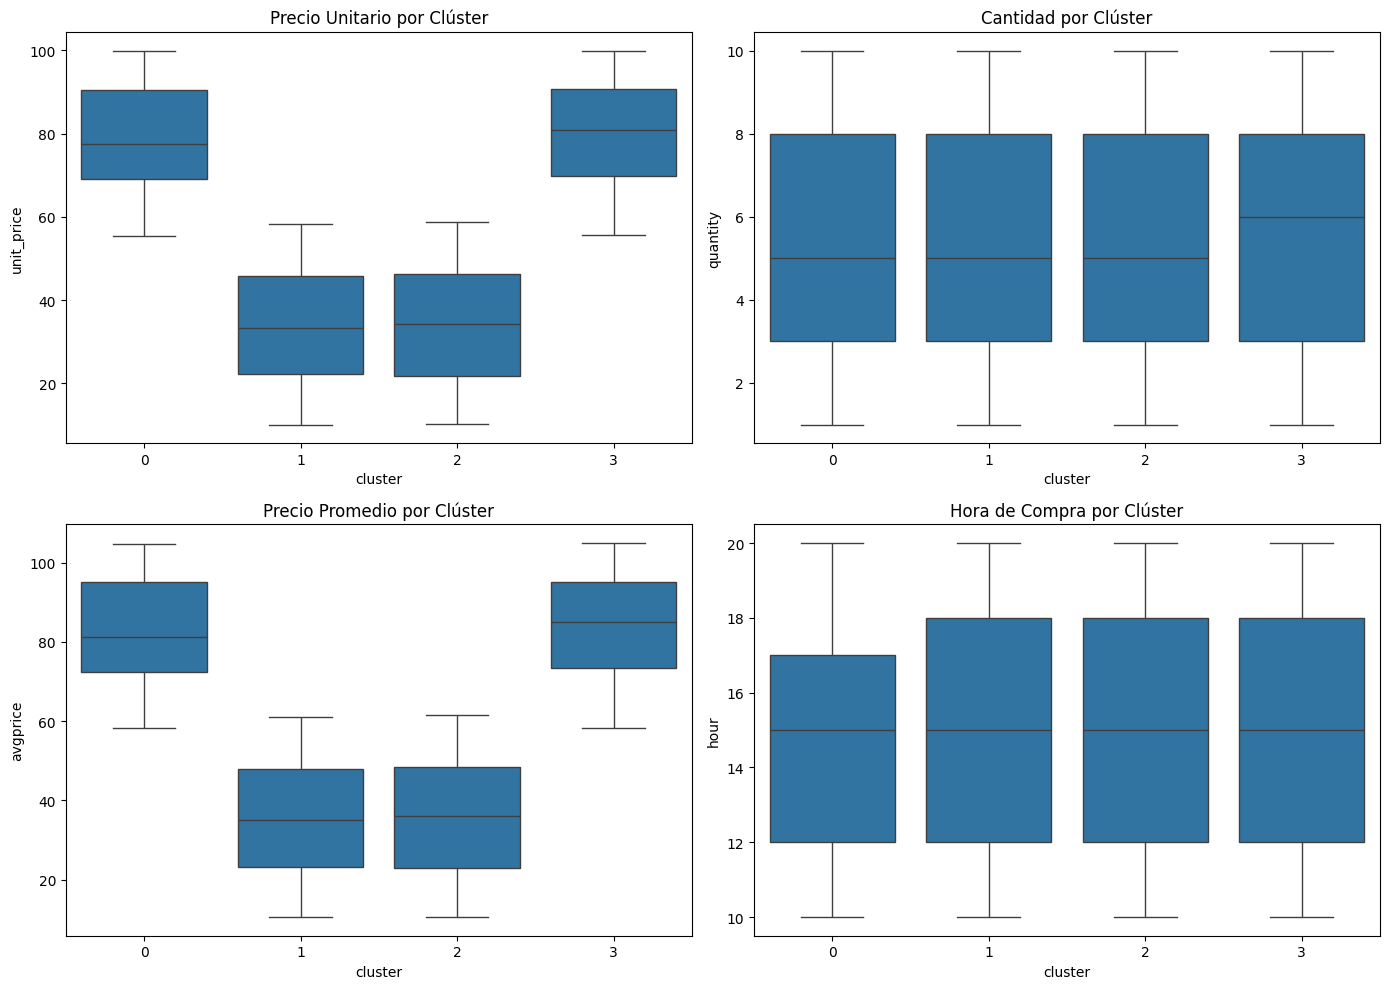

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(data=df, x='cluster', y='unit_price', ax=axes[0, 0])
sns.boxplot(data=df, x='cluster', y='quantity', ax=axes[0, 1])
sns.boxplot(data=df, x='cluster', y='avgprice', ax=axes[1, 0])
sns.boxplot(data=df, x='cluster', y='hour', ax=axes[1, 1])
axes[0, 0].set_title("Precio Unitario por Clúster")
axes[0, 1].set_title("Cantidad por Clúster")
axes[1, 0].set_title("Precio Promedio por Clúster")
axes[1, 1].set_title("Hora de Compra por Clúster")
plt.tight_layout()
plt.show()

In [30]:
import pickle

with open("kmeans.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("encoder.pkl", "wb") as f:
    pickle.dump(le_dict, f)

# Descargar archivos
files.download("kmeans.pkl")
files.download("scaler.pkl")
files.download("encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>